# Classification and Unsupervised Learning Examples

In [ ]:
# import our libraries
%matplotlib notebook

from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

<IPython.core.display.Javascript object>


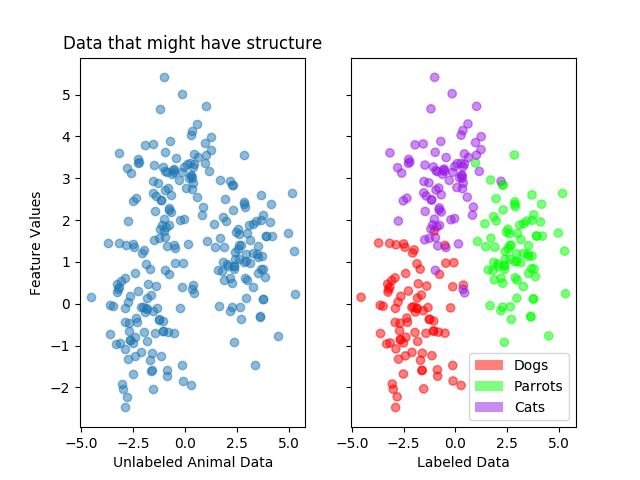

In [2]:
# Show how unsupervised learning, or supervised learning classification could be applied to mock data

# Generate some example data clusters from SKLearns utility.  
# This can be used to test classifiers or visualize examples.
centers = [[-2,-.5],[3,1.3],[-.5,3]]
X, y = make_blobs(n_samples=250, centers=centers, n_features=2, random_state=0,center_box=(-15,15))

# creating a custom color map so we can plot scatters with matching colors in Truth labels & legend
cmap_name = 'my_color_list'
#        --- red ---     --- blue ---   --- purple ---        # colors at 0.5 alpha (opacity)
colors = [(1, 0, 0,0.5), (0, 1, 0,0.5), (0.6, 0.1, 0.9,0.5)]  # R -> G -> B
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))

# plt.scatter(X[:,0], X[:,1],  c=y, label='data')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# 1st plot - what your data would look like without labels
ax1.scatter(X[:,0], X[:,1], alpha=.5, label='classes')
# 2nd plot - what your data would look like with Truth labels applied
ax2.scatter(X[:,0], X[:,1], c=y, cmap=cm)

ax1.set_title('Data that might have structure')
ax1.set_xlabel('Unlabeled Animal Data')
ax1.set_ylabel('Feature Values')
ax2.set_xlabel('Labeled Data')

class_labels = ['Dogs','Parrots','Cats']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,class_labels,loc=4)

plt.show()


<IPython.core.display.Javascript object>


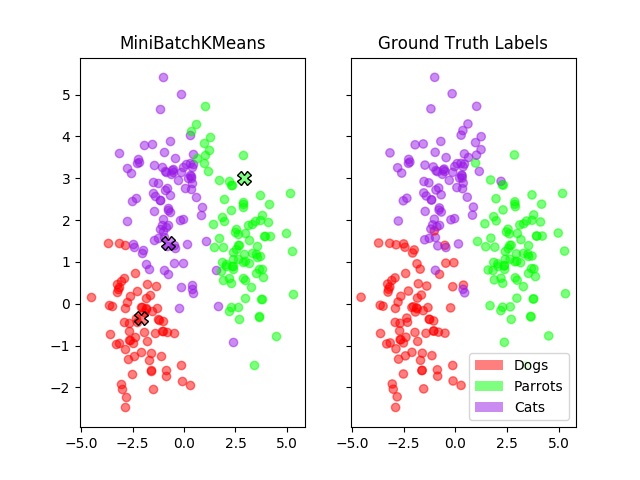

In [3]:
# Compare Unsupervised clustering using KMeans to Truth set

n_clusters = len(centers)
mbkmeans = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, batch_size=10, n_init=10, max_no_improvement=10, verbose=0)
mbkmeans.fit(X)
mbk_means_cluster_centers = np.sort(mbkmeans.cluster_centers_, axis=0)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
true_cluster_centers = np.sort(mbkmeans.cluster_centers_, axis=0)
true_labels = pairwise_distances_argmin(X, true_cluster_centers)


# MiniBatchKMeans
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# --HACK-- change order of KMeans colors so they match Truth labels
colors = [(1, 0, 0,0.5),(0.6, 0.1, 0.9,0.5), (0, 1, 0,0.5) ]  # R -> G -> B

for k, color in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = true_cluster_centers[k]
    
    ax1.scatter(X[my_members, 0], X[my_members, 1], c=color, cmap=cm)
    ax1.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor=color, markeredgecolor='k', markersize=10)
    
# 2nd plot - what your data would look like with Truth labels applied
ax2.scatter(X[:,0], X[:,1], c=y, cmap=cm)
# ax2.plot(X[my_members, 0], X[my_members, 1], 'o', markerfacecolor=color, marker='.')

ax1.set_title('MiniBatchKMeans')
ax2.set_title('Ground Truth Labels')
plt.legend(recs,class_labels,loc=4)
plt.show()